## 머신러닝을 이용한 텍스트 분류

텍스트 분류(Text Classification)란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크이다.  
이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높다.

우리가 평소에 쉽게 접할 수 있는 텍스트 분류의 영역으로는 
- '스팸 메일 자동 분류', 
- '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', 
- '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 
등이 있다.

이러한 분류들을 AI 알고리즘을 통해 수행할 때는 일반적으로 아래와 같은 과정을 거친다.

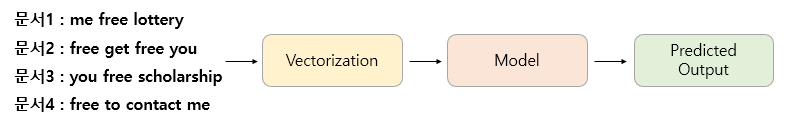

In [1]:
from IPython.display import Image
Image(filename='capture/text_classification_flow.png') 

주어진 문장 또는 문서를 벡터화하고, 이를 AI 모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴하게 된다.

만약 딥러닝 모델을 사용한다면
- 벡터화 방법으로는 워드 임베딩을 사용하고
- RNN, CNN, BERT와 같은 딥러닝 모델을 사용해서 클래스를 예측
할 수 있을 것이다.

하지만 AI 알고리즘에는 딥러닝이 아닌 다른 우수한 수많은 머신러닝 알고리즘들도 존재한다.

여기서는 머신러닝 알고리즘에 대해서 알아보겠다.

텍스트 분류에는 여러 종류가 있는데
- 클래스가 2개인 이진 분류(Binary Classification)
- 클래스가 3개 이상인 경우 다중 분류(Multiclass Classification)
이 대표적이다.

다중 클래스 분류를 해보자!

### 로이터 뉴스 데이터 분류

로이터 뉴스 데이터는
- 총 46개의 클래스로 구성
- 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한
데이터 이다.

#### 데이터 다운로드

In [3]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('done')

done


In [4]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


num_words 는
- 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지를 조절

각 단어는 고유한 번호가 정해져 있는 상태이고, num_words 를 통해서 사용할 단어의 수를 정한다.

주의할 점은 
- 데이터를 받아올 때, num_words의 인자로 10,000을 기재한다고 해서 10,000보다 높은 정수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 점이다.

num_words로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 된다.

이는 OOV 문제라는 자연어 처리의 대표적인 문제와 연관이 있는데. 이에 대해서는 뒤에서 언급하겠다.

#### 데이터 확인

In [6]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [7]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 준다.

In [8]:
print(y_train[0])
print(y_test[0])

3
3


In [9]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


이 뉴스 데이터는 총 46개의 클래스를 가지고 있다.  
이 정도면 적지는 않은 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 것 같은 예감이 든다.

#### 데이터 분포 확인

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


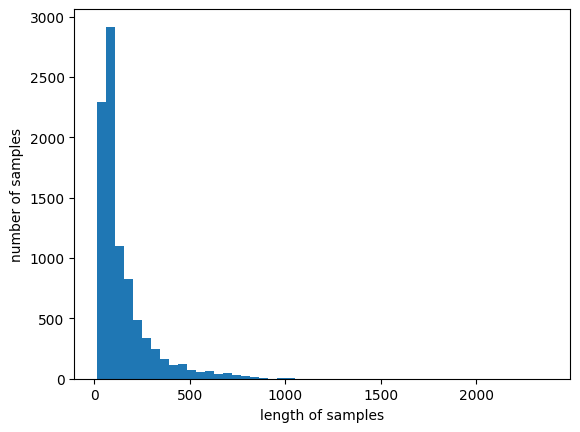

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

길이가 가장 긴 뉴스의 길이는 2,376 이다. 평균 길이는 145 정도다.  
아무래도 길이가 가장 긴 뉴스의 길이가 다른 뉴스에 비해 유독 긴 편인 것 같다.


우리가 맞춰야 하는 클래스의 분포를 확인해볼까? 

모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지와 같은 것들을 사전에 확인해 보아야 한다.

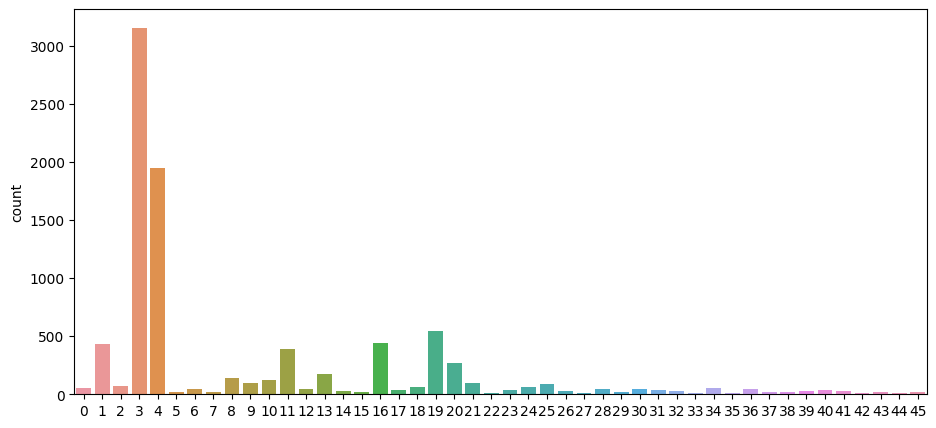

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [12]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재한다.  
그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 네 번째로 많다.

이렇게 각 클래스가 몇 개가 존재하는지도 확인해 보았다.

#### 데이터 복원

원본 데이터로 복원해보자.

이 데이터는 이미 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있다.  
하지만 일반적인 상황이라면 텍스트를 숫자로 수치화하는 과정을 처음부터 해야 하므로, 굳이 닫시 텍스트로 돌려보자.

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공한다.  
이를 word_index 로 저장해보자.

In [13]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

550378/550378 [==============================] - 0s 0us/step
=3


In [14]:
word_index['the']

1

단어 'the'는 정수 1과 맵핑된다. 그렇다면 단어 'it' 는?

In [15]:
word_index['it']

13

그런데 이 데이터에는 숨겨진 비밀이 하나 있는데, 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어이다.  
그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어이다. 

다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 +3 을 한 숫자가 원래 고유한 숫자이다.  
이건 로이터 뉴스 데이터가 정의한 일종의 약속이기 때문이다.

In [16]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [17]:
print(index_to_word[4])
print(index_to_word[16])

the
it


이 데이터를 위해 약속된 비밀은 더 있다. 

0번, 1번, 2번은 사실 각각 <pad>, <sos>, <unk>라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호인 것이다.

In [18]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('=3')

=3


자, 이제 index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원해보자.

In [19]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### OOV 문제와 UNK 토큰

기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 한다. 

기계가 미처 배우지 못한 모르는 단어를 OOV(Out-Of-Vocabulary) 또는 UNK(Unknown) 이라고 표현한다.  
어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 \<unk>라는 일관된 특별 토큰으로 변환한다.
    
여기서는 10000 개 까지만 단어장에 담았으므로, 해당 단어장에 없는 단어들은 모두 \<unk> 로 취급되어 정수 2로 변환되어서 로드가 된다.

In [20]:
sample_word = [4, 587, 23, 133, 6, 30, 515]
print(' '.join([index_to_word[index] for index in sample_word]))

the transaction is expected to be completed


이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해보자.

In [23]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [24]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [25]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [26]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

### 벡터화 하기

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


여기서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용할 것이다.

사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬이다.

#### DTM 생성

Document Term Matrix, DTM은 사이킷런의 CountVectorizer()를 통해서 생성할 수 있다.

In [28]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


훈련용 뉴스의 수가 총 8,982개였기 때문에 DTM의 행의 개수는 8,982개가 된다.

그런데 이상한 점은 앞에서 데이터를 로드할 때, num_words=10,000이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않는다.  
그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문이다.

#### TF-IDF 행렬 생성

DTM 행렬을 이어서 TF-IDF 행렬을 만들어보자.

TF-IDF 행렬은 DTM의 단점을 보정해 주는 효과를 가지고 있다. https://wikidocs.net/31698 참고

TF-IDF Matrix는 사이킷런의 TfidfTransformer()를 통해서 생성한다.  
TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가진다.

In [30]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### 나이브 베이즈 분류기

In [31]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


나이브 베이즈 분류기에 대해 간단히 알아보자.  
https://youtu.be/3JWLIV3NaoQ 참고

- 총 8개의 메일 중에 4개의 메일이 스팸 메일
- 전체 메일 중에서 coupon이라는 단어가 들어간 메일은 3개
- 모든 스팸 메일 중에서 단어 coupon이 들어간 메일은 2개

이 때 coupon 이라는 단어가 들어갔을 때 해당 메일이 스팸 메일일 확률은?  

P(coupon | spam) * P(spam) / P(coupon) 이므로  

P(coupon | spam) 은 스팸 메일 중에 coupon 이 있는 경우므로 -> 2/4  
P(spam) 은 전체 메일 중에 spam 의 확률이므로 -> 4/8  
P(coupon) 은 전체 메일 중에 coupon 이 들어간 메일의 경우므로 -> 3/8  

(2/4 * 4/8) / (3/8) = 8/12 = 2/3 = 0.66666 = 약 0.667 = 66.7%

In [32]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

테스트 데이터도 TF-IDF 행렬로 변환해줘야 한다.

In [33]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [34]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [35]:
y_test[3]

4

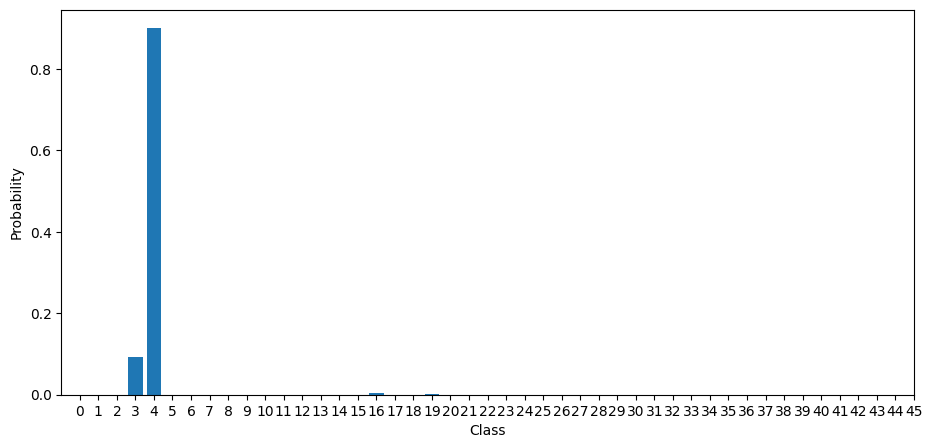

In [36]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [37]:
model.predict(tfidfv_test[3])

array([4], dtype=int64)

모델은 4번 클래스를 약 90%의 확률로 확신하는데, 10%의 확률로 3번 클래스라고 판단한다.  
90%의 확률로 확신하므로 모델이 예측한 레이블은 4번입니다. 해당 샘플은 정확하게 예측했다.

### F1-Score, Confusion Matrix

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


오늘의 실습에서는 성능 비교를 위한 척도로 정확도(Accuracy) 를 사용한다.  
하지만 Accuracy 외에 또 다른 방법에는 F1-score이 있다.

분류성능평가지표에 대한 자세한 설명은 다음 링크 참고 -> https://sumniya.tistory.com/26

사이킷런의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 classification_report() 함수를 제공한다.

In [39]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 개수로 가중평균
- accuracy: 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

#### confusion matrix

https://youtu.be/M0GBAzFV9_A 참고

TP
- 정답지도 True 인데 답안지도 True 일 때

FN
- 정답지는 True 인데 답안지에 False 로 제출한 것

In [41]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


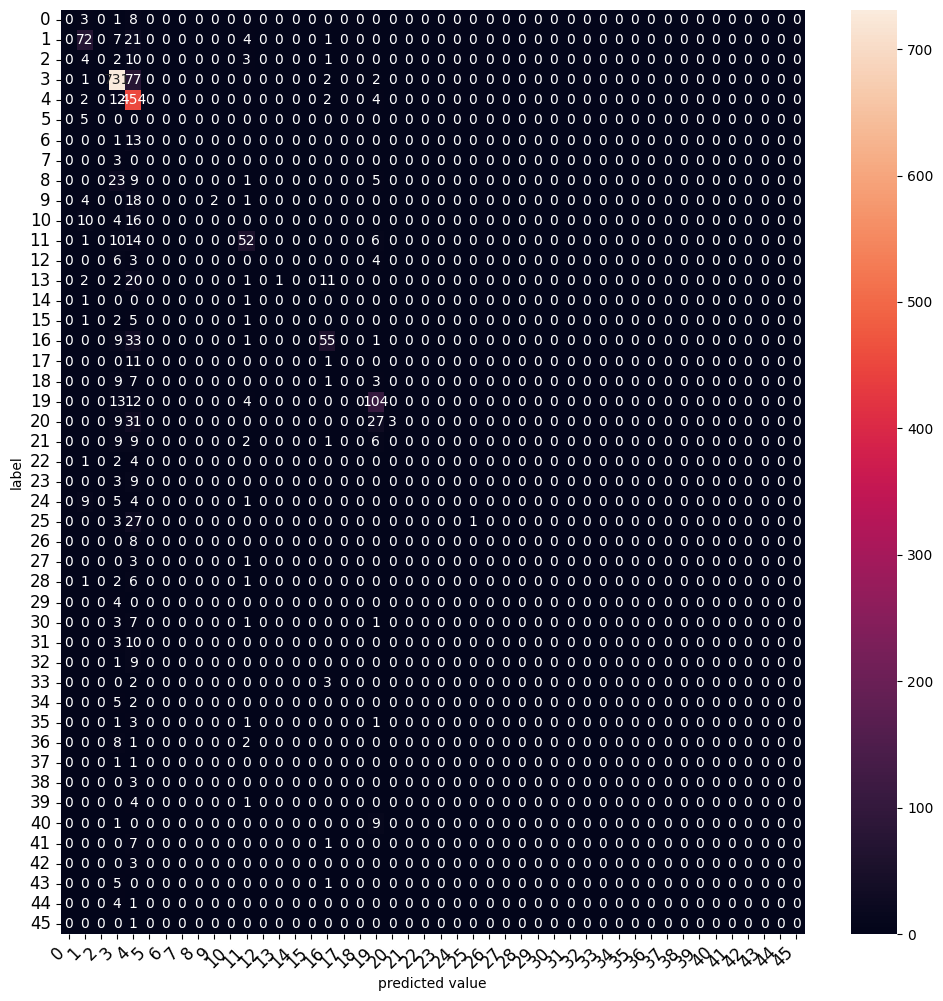

In [42]:
graph_confusion_matrix(model, tfidfv_test, y_test)

### 다양한 머신러닝 모델 사용

#### Complement Naive Bayes Classifier(CNB)

데이터가 불균형할 경우를 대비해 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기이다.

컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있다.  
따라서 컴플리먼트 나이브 베이즈 분류기는 나이브 베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋다.

In [43]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [44]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


#### 로지스틱 회귀(Logistic Regression)

가장 널리 알려진 두 개의 선형 분류 알고리즘인 로지스틱 회귀와 서포트 벡터 머신을 통해서 로이터 뉴스를 분류해 보자.

로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원한다.

다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression) 라고도 한다.  
주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점이다.

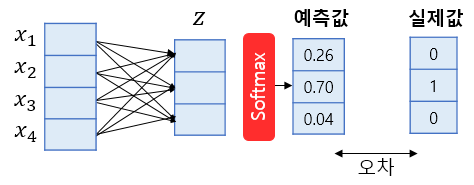

In [45]:
from IPython.display import Image
Image(filename='capture/softmax.png') 

소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수이다.

예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있다.

3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다.

오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습된다.

In [46]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [47]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.811219946571683


### 선형 서포트 벡터 머신(Linear Support Vector Machine)

서포트 벡터 머신(SVM)은 대표적인 선형 분류 알고리즘이다.  
https://youtu.be/y4CYcpRiNsw 참고

서포트 벡터란?  
Decision Boundary 와 가장 가까운 각 클래스의 데이터를 말한다.

In [48]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [49]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7956366874443455


### 결정 트리(Decision Tree)

결정 트리는 분류와 회귀 문제에 널리 사용하는 모델이다. 

기본적으로 결정 트리는 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습한다.  
이 질문은 스무고개 놀이의 질문과 비슷하다.  
https://youtu.be/n0p0120Gxqk 참고

In [50]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [51]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있다.  
DTM이나 TF-IDF 행렬의 경우 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있다.

### 랜덤 포레스트(Random Forest)

앙상블(Ensemble) 이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다. 

뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼 텐데, 모델 자체가 앙상블을 사용하는 앙상블 모델들도 존재한다.  
랜덤 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델이다.  
https://youtu.be/nZB37IBCiSA 참고

In [52]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [53]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


### 그래디언트 부스팅 트리(GradientBoostingClassifier)

그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델이다. 

그레디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.

In [54]:
grbt = GradientBoostingClassifier(random_state=0, verbose=3)
grbt.fit(tfidfv, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.4608           15.76m
         2       95544.1548           15.73m
         3      105411.1055           15.52m
         4 26490374809120059619893320924222374741943986946048.0000           15.38m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           15.25m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           15.13m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.99m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           14.85m
         9 33324642592284536946719451054658203875213282035455263802212959137648421458664296

        54 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.52m
        55 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.35m
        56 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.19m
        57 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            7.03m
        58 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            6.86m
        59 14834291270935598097793813192422686817633454293445808551806972586635235618984506254543094943361504759490214512223227966451089408.0000            6.70m
        60 14834291270935598

GradientBoostingClassifier(random_state=0, verbose=3)

In [55]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7666963490650045


### 보팅(Voting)

데이터 경진 대회 캐글(Kaggle)에서 상위권을 차지한 많은 솔루션들이 앙상블(Ansemble learning)이라는 방법을 사용한다.

그 중에서 투표를 통해 결과를 도출하는 보팅(Voting) 이라는 방법에 대해서 이해해 보자.  
https://youtu.be/y4Wh0E1d4oE 참고

In [56]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 voting='soft')

In [57]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8165627782724845


실습 중 가장 높은 정확도를 보였던 소프트맥스 회귀보다 좀 더 높은 정확도를 얻었다.